In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker as tick
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
%matplotlib inline

# OUTWARD REMITTANCES (sending, outgoing)

In [2]:
# Data cleaning
outrem = pd.read_excel('outward_remit.xlsx')
outrem.sample(10)
outrem = outrem[:215]
outrem = outrem.dropna(how='all').rename(columns={'Outward remittance flows (US$ million)': 'Outflow Country'})
outrem0 = outrem.replace(np.nan, 0)
outrem0.at[214, 'Outflow Country'] = 'World'    # replace Nan label with 'World' 

outrem0['total_rem'] = outrem0.sum(axis=1)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/3449425255.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outrem0['total_rem'] = outrem0.sum(axis=1)


# (GLOBAL) Countries SENDING the most remittances

In [3]:
send_countries = outrem0.rename(columns={'Outflow Country': 'outflow_country'})
send_countries = send_countries.set_index('outflow_country').sort_values('total_rem',ascending=False)[1:]

### Top 10 Remittance Sending Countries: 
#### US, Saudi Arabia, Switzerland, Germany, UAE, Russia, France, Juwait, UK, Luxembourg

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/1359685951.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions


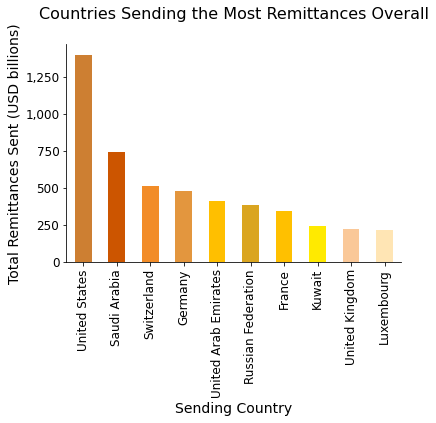

In [4]:
# Formatting
plt.rc('font', size=14)    # overall font
plt.title('Countries Sending the Most Remittances Overall', fontsize=16,y=1.09)
plt.gca().spines[['top', 'right']].set_visible(False)    # remove top and right figure bounds (aesthetic)
plt.ticklabel_format(style='plain', axis='y')    # remove '1e6' (million) multiplier from y-axis
col = ['#CD7F32','#CC5500','#F28C28','#E3963E','#FFBF00','#DAA520','#FFC000','#FFEA00','#FAC898','#FFE5B4']
send_countries.total_rem.head(10).plot(kind='bar', color=col, fontsize=12, xlabel='Sending Country', ylabel='Total Remittances Sent (USD billions)')

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions
plt.show()

### Top SENDERS (1-5), (6-10), (11-15)

In [5]:
send_countries = send_countries.drop('total_rem', axis=1)
# dropping aggregate column so it doesn't create outlier in trendline

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/2158400041.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions


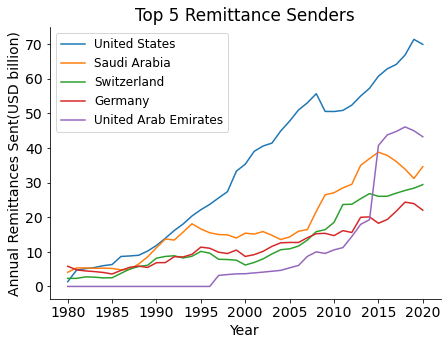

In [6]:
plt.figure(figsize=(7,5))
plt.axes(title='Top 5 Remittance Senders', xlabel='Year', ylabel='Annual Remittances Sent(USD billion)')
plt.rc('font', size=14)    # overall font
plt.gca().spines[['top', 'right']].set_visible(False)    # remove top and right figure bounds (aesthetic)
plt.ticklabel_format(style='plain', axis='y')    # remove '1e6' (million) multiplier from y-axis

for i in range(5):
    send_countries.iloc[i].plot()

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions
plt.legend(loc='best', fontsize=12)
plt.show()

## Top Senders 2020

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/2367551683.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


,2020
outflow_country,
United States,69918.000000
United Arab Emirates,43240.299523
Saudi Arabia,34595.847461
Switzerland,29403.688397
Germany,22024.495026
China,18120.882932
Kuwait,17357.178323
Russian Federation,16872.180000
France,14632.716778


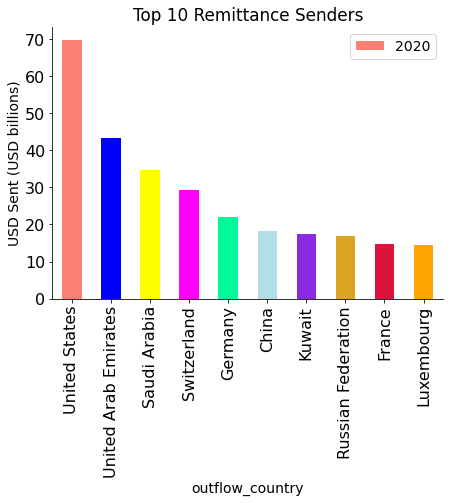

In [7]:
top2020 = send_countries.sort_values(2020, ascending=False)

plt.figure(figsize=(7,5))
plt.rc('font', size=14) 
colors = ['salmon','blue','yellow','magenta','mediumspringgreen','powderblue','blueviolet','goldenrod','crimson','orange']
top2020[2020][:10].plot(kind='bar', ylabel='USD Sent (USD billions)', title='Top 10 Remittance Senders', color=colors, fontsize=16,legend=True)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])

pd.DataFrame(top2020[2020].head(10))

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/237741266.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


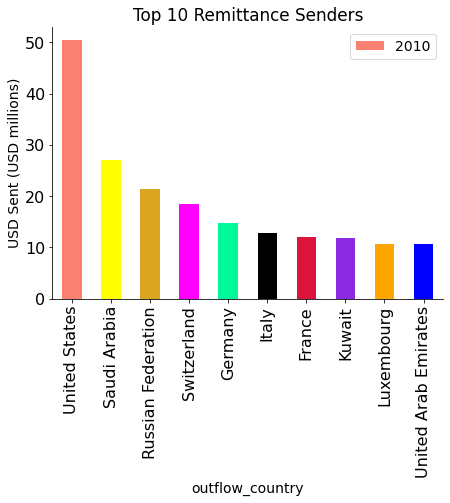

In [8]:
# Top Senders 2010
top2010 = send_countries.sort_values(2010, ascending=False)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)  
colors10 = ['salmon','yellow','goldenrod','magenta','mediumspringgreen','black','crimson','blueviolet','orange','blue']

top2010[2010][:10].plot(kind='bar', ylabel='USD Sent (USD millions)', color=colors10, title='Top 10 Remittance Senders', fontsize=16,legend=True)
plt.gca().spines[['top', 'right']].set_visible(False)  

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()


/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/1782271751.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions


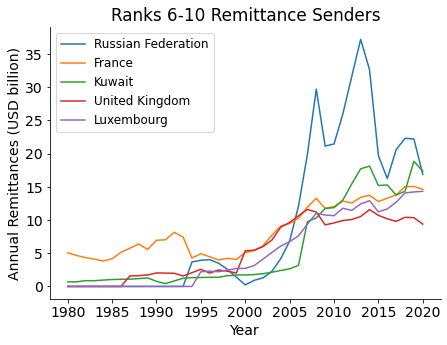

In [9]:
# Top Senders (#6-10)
plt.figure(figsize=(7,5))
plt.axes(title='Ranks 6-10 Remittance Senders', xlabel='Year', ylabel='Annual Remittances (USD billion)')
plt.rc('font', size=14)   
plt.gca().spines[['top', 'right']].set_visible(False)

plt.ticklabel_format(style='plain', axis='y')
for i in range(5,10):
    send_countries.iloc[i].plot()

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions
plt.legend(loc='best', fontsize=12)


In [10]:
# Top Senders (#11-15)
plt.figure(figsize=(7,5))
plt.axes(title='Ranks 11-15 Remittance Senders', xlabel='Year', ylabel='Annual Remittances (USD billion)')
plt.rc('font', size=14)   
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ticklabel_format(style='plain', axis='y')

for i in range(10,15):
    send_countries.iloc[i].plot()

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=12)
plt.close()

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/80906922.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


In [11]:
plt.close('all')

# Regional Remittance OUTFLOWS Analysis

In [12]:
import geonamescache
import ast
gc = geonamescache.GeonamesCache()
countries = pd.DataFrame(gc.get_countries()).T
continents = pd.DataFrame(gc.get_continents()).T

In [13]:
continents = continents.rename(columns={'continentCode': 'continentcode'})
# cleaning up imported column to merge on so it matches
mapp = pd.merge(countries, continents, on='continentcode', how='left')
# mapping countries onto continents dictionary
mapp = mapp.rename(columns={'name_x': 'Outflow Country'})
# renaming to match col in next merge
mapp2 = mapp[['Outflow Country', 'continentcode', 'capital', 'population_x', 'currencycode', 'languages', 'geonameid']]
# selecting data columns from mapp I want in order to map continent codes (& other data) onto WB dataset
out_global = outrem0.merge(mapp2, on='Outflow Country', how='left')

#### Isolating countries with null continent codes to match them

In [14]:
null_cont = out_global[['Outflow Country', 'continentcode']]
null_cont.continentcode.isna().describe()
# 35 uncategorized countries
null_cont['null'] = null_cont['continentcode'].isna()
null_cont = null_cont.sort_values('null', ascending=False)[1:34]
# creating df to identify countries with null continentcode. will update their values in broader df

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/76288282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_cont['null'] = null_cont['continentcode'].isna()


In [15]:
null_cont.index
out_global.at[105, 'continentcode'] = 'AS'
out_global.at[128, 'continentcode'] = 'OC'
out_global.at[211, 'continentcode'] = 'AS'
out_global.at[13, 'continentcode'] = 'CB'
out_global.at[210, 'continentcode'] = 'AS'
out_global.at[209, 'continentcode'] = 'CB'
out_global.at[102, 'continentcode'] = 'AS'
out_global.at[101, 'continentcode'] = 'AS'
out_global.at[106, 'continentcode'] = 'AS'
out_global.at[207, 'continentcode'] = 'SA'
out_global.at[70, 'continentcode'] = 'AF'
out_global.at[190, 'continentcode'] = 'AS'
out_global.at[158, 'continentcode'] = 'EU'
out_global.at[64, 'continentcode'] = 'EU'
out_global.at[62, 'continentcode'] = 'AF'
out_global.at[57, 'continentcode'] = 'AF'
out_global.at[169, 'continentcode'] = 'CB'
out_global.at[170, 'continentcode'] = 'EU'
out_global.at[84, 'continentcode'] = 'AS'
out_global.at[142, 'continentcode'] = 'EU'
out_global.at[46, 'continentcode'] = 'AF'
out_global.at[89, 'continentcode'] = 'AS'
out_global.at[44, 'continentcode'] = 'AF'
out_global.at[43, 'continentcode'] = 'AF'
out_global.at[178, 'continentcode'] = 'CB'
out_global.at[179, 'continentcode'] = 'CB'
out_global.at[180, 'continentcode'] = 'CB'
out_global.at[181, 'continentcode'] = 'CB'
out_global.at[38, 'continentcode'] = 'EU'
out_global.at[186, 'continentcode'] = 'AS'
out_global.at[31, 'continentcode'] = 'AF'
out_global.at[27, 'continentcode'] = 'AS'

continent_dict = {
    'AS': 'Asia',
    'AF': 'Africa',
    'SA': 'South America',
    'NA': 'North America',
    'EU': 'Europe',
    'OC': 'Oceania',
    'CB': 'Caribbean'
}
out_global['continent'] = out_global.continentcode.map(continent_dict)
out_global.continent.isna().describe()    # 2 with null continent ('World', 'LICs')

# Creating regional lists
EUCA = 'Albania; Armenia; Azerbaijan; Belarus; Bosnia and Herzegovina; Bulgaria; Croatia; Georgia; Kazakhstan; Kyrgyzstan; Montenegro; Republic of Moldova; Romania; Russian Federation; Serbia; Tajikistan; Macedonia; Turkey; Turkmenistan; Ukraine; Uzbekistan'
EUCA = EUCA.replace(';', ',')
EUCA = EUCA.split(', ')

EAP = 'Australia; Brunei Darussalam; Cambodia; China; Cook Islands; Democratic People’s Republic of Korea; Fiji; Indonesia; Japan; Kiribati; Lao People’s Democratic Republic; Malaysia; Marshall Islands; Micronesia; Mongolia; Myanmar; Nauru; New Zealand; Niue; Palau; Papua New Guinea; Philippines; Republic of Korea; Samoa; Singapore; Solomon Islands; Thailand; Timor-Leste; Tokelau ; Tonga; Tuvalu; Vanuatu; Vietnam'
EAP = EAP.replace(';', ',')
EAP = EAP.split(', ')

SAS = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

WEU = 'Andorra; Austria; Belgium; Cyprus; Czechia; Denmark; Estonia; Finland; France; Germany; Greece; Holy See; Hungary; Iceland; Ireland; Italy; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Netherlands; Norway; Poland; Portugal; San Marino; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom'
WEU = WEU.replace(';', ',')
WEU = WEU.split(', ')

LAC = 'Anguilla; Antigua and Barbuda; Argentina; Bahamas; Barbados; Belize; Bolivia; Brazil; British Virgin Islands; Chile; Colombia; Costa Rica; Cuba; Dominica; Dominican Republic; Ecuador; El Salvador; Grenada; Guatemala; Guyana; Haiti; Honduras; Jamaica; Mexico; Montserrat; Nicaragua; Panama; Paraguay; Peru; Saint Kitts and Nevis; Saint Lucia; Saint Vincent and the Grenadines; Suriname; Trinidad and Tobago; Turks and Caicos Islands; Uruguay; Venezuela'
LAC = LAC.replace(';', ',')
LAC = LAC.split(', ')

MENA = 'Algeria; Bahrain; Egypt, Arab Rep.; Iran; Iraq; Israel; Jordan; Kuwait; Lebanon; Libya; Morocco; Oman; Qatar; Saudi Arabia; State of Palestine; Syrian Arab Republic; Tunisia; United Arab Emirates; Yemen'
MENA = MENA.replace(';', ',')
MENA = MENA.split(', ')

NA = ['Canada', 'United States']

ESAF = 'Angola; Botswana; Burundi; Comoros; Djibouti; Eritrea; Ethiopia; Kenya; Lesotho; Madagascar; Malawi; Mauritius; Mozambique; Namibia; Rwanda; Seychelles; Somalia; South Africa; South Sudan; Sudan; Swaziland; Uganda; United Republic of Tanzania; Zambia; Zimbabwe'
ESAF = ESAF.replace(';', ',')
ESAF = ESAF.split(', ')

WCAF = 'Benin; Burkina Faso; Cabo Verde; Cameroon; Central African Republic; Chad; Congo; Côte d’Ivoire; Democratic Republic of the Congo; Equatorial Guinea; Gabon; Gambia; Ghana; Guinea; Guinea-Bissau; Liberia; Mali; Mauritania; Niger; Nigeria; Sao Tome and Principe; Senegal; Sierra Leone; Togo'
WCAF = WCAF.replace(';', ',')
WCAF = WCAF.split(', ')

reg_list = ['EUCA', 'EAP', 'SAS', 'WEU', 'LAC', 'MENA', 'NA', 'ESAF', 'WCAF']

# With these lists... create new column to identify region
out_global.shape
out_global.insert(50, 'region', np.nan)

In [16]:
# Assigning each country to a region based on list fron UNICEF.
for index in range(out_global.shape[0]):
    if out_global.loc[index, 'Outflow Country'] in EUCA:
        out_global.loc[index, 'region'] = 'EUCA'
    elif out_global.loc[index, 'Outflow Country'] in EAP:
        out_global.loc[index, 'region'] = 'EAP'
    elif out_global.loc[index, 'Outflow Country'] in SAS:
        out_global.loc[index, 'region'] = 'SAS'
    elif out_global.loc[index, 'Outflow Country'] in WEU:
        out_global.loc[index, 'region'] = 'WEU'
    elif out_global.loc[index, 'Outflow Country'] in LAC:
        out_global.loc[index, 'region'] = 'LAC'
    elif out_global.loc[index, 'Outflow Country'] in MENA:
        out_global.loc[index, 'region'] = 'MENA'
    elif out_global.loc[index, 'Outflow Country'] in NA:
        out_global.loc[index, 'region'] = 'NA'
    elif out_global.loc[index, 'Outflow Country'] in ESAF:
        out_global.loc[index, 'region'] = 'ESAF'
    elif out_global.loc[index, 'Outflow Country'] in WCAF:
        out_global.loc[index, 'region'] = 'WCAF'
    else: pass

In [17]:
# Identify and classify countries with null regions
null_reg = out_global[out_global.region.isna()]
null_reg
out_global.at[3, 'region'] = 'EAP'
out_global.at[9, 'region'] = 'LAC'
out_global.at[13, 'region'] = 'LAC'
out_global.at[21, 'region'] = 'LAC'
out_global.at[35, 'region'] = 'LAC'
out_global.at[38, 'region'] = 'WEU'
out_global.at[43, 'region'] = 'WCAF'
out_global.at[44, 'region'] = 'WCAF'
out_global.at[46, 'region'] = 'WCAF'
out_global.at[49, 'region'] = 'LAC'
out_global.at[51, 'region'] = 'WEU'
out_global.at[57, 'region'] = 'MENA'
out_global.at[62, 'region'] = 'ESAF'
out_global.at[64, 'region'] = 'WEU'
out_global.at[68, 'region'] = 'EAP'
out_global.at[70, 'region'] = 'WCAF'
out_global.at[77, 'region'] = 'EAP'
out_global.at[84, 'region'] = 'EAP'
out_global.at[89, 'region'] = 'MENA'
out_global.at[102, 'region'] = 'EAP'
out_global.at[103, 'region'] = 'EUCA'
out_global.at[105, 'region'] = 'EUCA'
out_global.at[106, 'region'] = 'EAP'
out_global.at[115, 'region'] = 'EAP'
out_global.at[126, 'region'] = 'EAP'
out_global.at[127, 'region'] = 'EUCA'
out_global.at[137, 'region'] = 'EAP'
out_global.at[142, 'region'] = 'EUCA'
out_global.at[169, 'region'] = 'LAC'
out_global.at[170, 'region'] = 'WEU'
out_global.at[178, 'region'] = 'LAC'
out_global.at[179, 'region'] = 'LAC'
out_global.at[180, 'region'] = 'LAC'
out_global.at[181, 'region'] = 'LAC'
out_global.at[188, 'region'] = 'ESAF'
out_global.at[207, 'region'] = 'LAC'
out_global.at[209, 'region'] = 'LAC'
out_global.at[210, 'region'] = 'MENA'
out_global.at[211, 'region'] = 'MENA'

out_global = out_global[out_global['region'].notna()]

In [18]:
out_global.shape
out_global.dtypes
pd.to_numeric(out_global.columns.values[1:42])
out_global = out_global.set_index('Outflow Country')

In [19]:
# Setting colors
ascol = 'cornflowerblue'
afcol = 'seagreen'
mencol = 'rosybrown'
nacol = '#C41E3A'
laccol = 'mediumpurple'
eucol = 'goldenrod'

## Total Remittances Sent by Continent

In [20]:
cont = out_global.groupby('continentcode').sum('total_rem').sort_values('total_rem', ascending=False)
contt = pd.DataFrame(cont['total_rem'])
contt['Trillions Sent (USD)'] = round((contt['total_rem'] / 1000000),3)
contt = contt.drop('total_rem',axis=1)
contt

,Trillions Sent (USD)
continentcode,
EU,3.203
AS,2.830
NA,1.557
AF,0.213
OC,0.130
SA,0.079
CB,0.005


/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/1362789854.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000000])


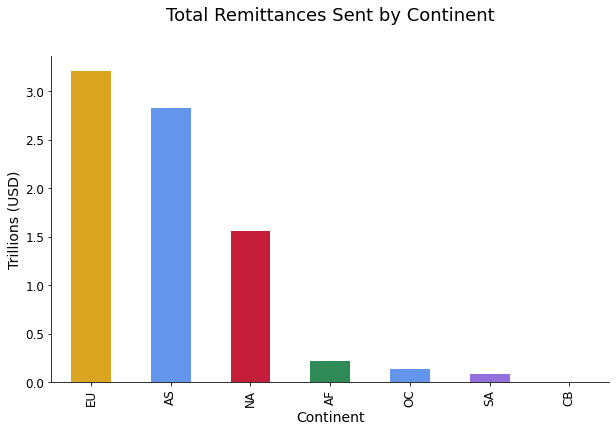

In [21]:
plt.figure()
plt.rc('font', size=14)    

cont.total_rem.plot(kind='bar', xlabel='Continent', ylabel='Trillions (USD)', legend=False, fontsize=12, color=[eucol,ascol,nacol,afcol,ascol,laccol,laccol], figsize=(10,6))
plt.title('Total Remittances Sent by Continent', fontsize=18, y=1.09)

plt.ticklabel_format(style='plain', axis='y')
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000000])
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.show()

## Total Remittances Sent by Region
- ### Eastern Eu & Central Asia (ECA) | East Asia & Pacific (EAP) | South Asia (SAS) |
- ### Western Eu (WEU) | Latin Am & Caribbean (LAC) | Middle East & North Af (MENA) | North Am (NA) |
- ### Eastern & Southern Africa (ESAF) | West & Central Af (WCAF)
#### Source: UNICEF regional classifications (https://data.unicef.org/regionalclassifications/)

In [22]:
regions = out_global.groupby('region').sum('total_rem').sort_values('total_rem', ascending=False)
regionss = pd.DataFrame(regions['total_rem'])
regionss['Trillions Sent (USD)'] = round((regionss['total_rem'] / 1000000),3)
regionss = regionss.drop('total_rem',axis=1)
regionss

,Trillions Sent (USD)
region,
WEU,2.778
MENA,1.951
NA,1.497
EAP,0.869
EUCA,0.523
LAC,0.144
SAS,0.109
ESAF,0.090
WCAF,0.077


/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/1701950211.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000000])


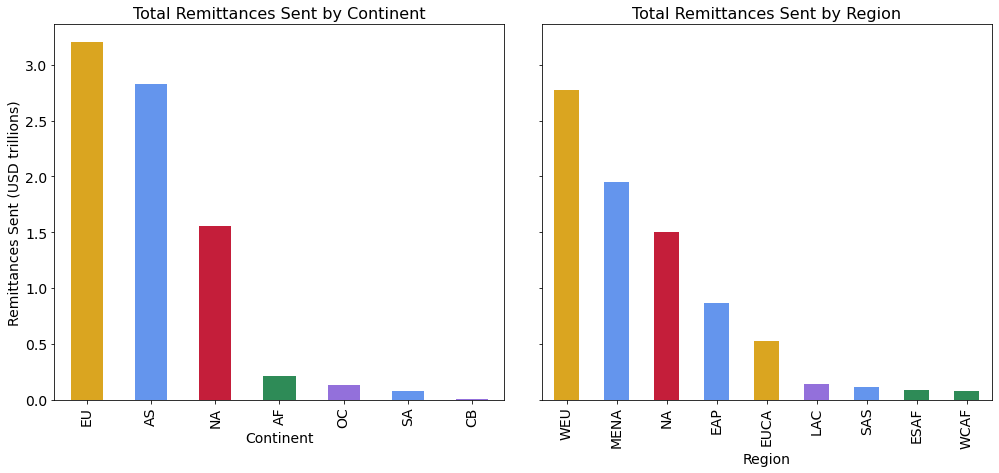

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
fig.tight_layout()
plt.rc('font', size=16) 

cont.total_rem.sort_values(ascending=False).plot(kind='bar', ax=axes[0], xlabel='Continent', ylabel='Remittances Sent (USD trillions)', color=[eucol,ascol,nacol,afcol,laccol,ascol,laccol])
axes[0].set_title('Total Remittances Sent by Continent', fontsize=16)

regions.total_rem.sort_values(ascending=False).plot(kind='bar', ax=axes[1], xlabel='Region', ylabel='Remittances Sent (USD trillions)', color=[eucol,ascol,nacol,ascol,eucol, laccol,ascol,afcol,afcol])
axes[1].set_title('Total Remittances Sent by Region', fontsize=16)

plt.ticklabel_format(style='plain', axis='y')
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000000])
plt.show()

In [24]:
prop = 100 * regions.total_rem / sum(regions.total_rem[:])
prop.plot(kind='pie', title='Regional Proportions of Total Remittances (%)', labels=round(prop, 2), legend='best')
plt.legend(regions.index, loc='upper left')
plt.close()

## Regional Remittances Sent over Time

In [25]:
regionss = regions.drop('total_rem', axis=1)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/2156288908.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


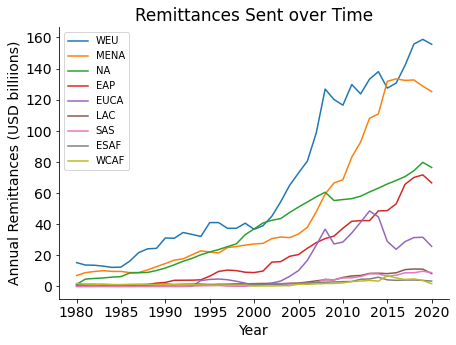

In [26]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(9):
    regionss.iloc[i].plot(title='Remittances Sent over Time', xlabel='Year', ylabel='Annual Remittances (USD billiions)')

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(fontsize=10)
plt.show()

# North America Analysis

In [27]:
na = out_global.loc[out_global.region == 'NA']
na = na.sort_values('total_rem', ascending=False)
nacoll = ['#C41E3A', '#FA5F55']

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/2090630177.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000000])


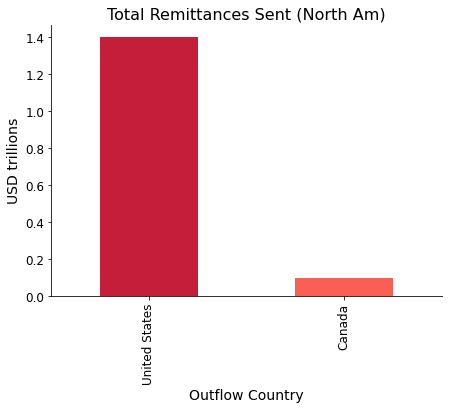

In [28]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
na.total_rem.plot(kind='bar', ylabel='USD trillions', color=nacoll, fontsize=12)
plt.title('Total Remittances Sent (North Am)', fontsize=16)
plt.gca().spines[['top', 'right']].set_visible(False)  

plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000000])
plt.show()

### North America Trends Over Time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/1112058566.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


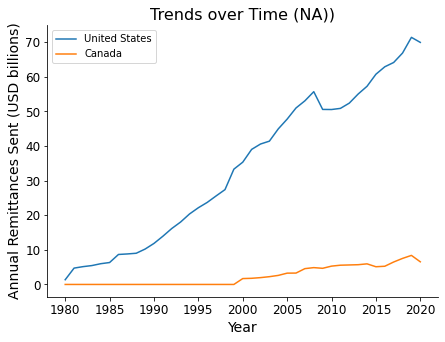

In [29]:
naa = na.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
plt.axes(xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.title('Trends over Time (NA))', fontsize=16)
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(2):
    naa.iloc[i].plot(fontsize=12)
    
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

# Europe Analysis

In [30]:
eu = out_global.loc[out_global.continentcode == 'EU']
eu = eu.sort_values('total_rem', ascending=False)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/1488638460.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


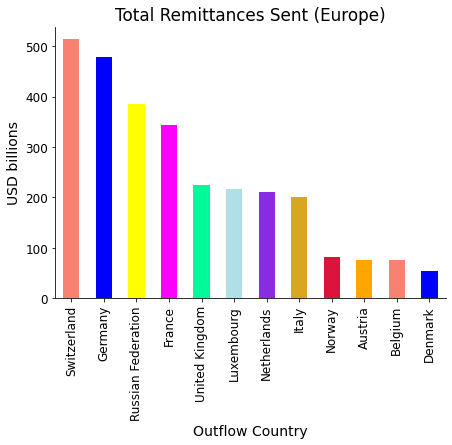

In [31]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
eu.total_rem[:12].plot(kind='bar', title='Total Remittances Sent (Europe)', ylabel='USD billions', color=colors, fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)  

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### Europe Trends Over Time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/1684144390.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


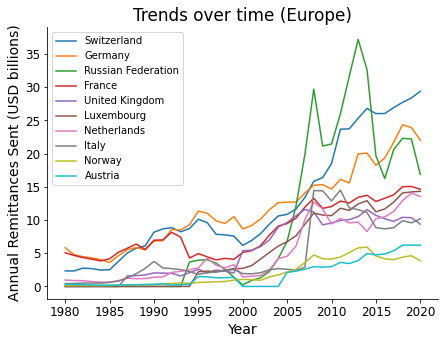

In [32]:
euu = eu.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)
# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (Europe)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    euu.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

In [33]:
# Ukraine probe
foo = outrem0.drop('total_rem', axis=1).set_index('Outflow Country')
foo.loc['Ukraine'].plot()
plt.close('all')    # close fig

# Asia Analysis

In [34]:
asia = out_global.loc[out_global.continentcode == 'AS']
asia = asia.sort_values('total_rem', ascending=False)
ascoll = ['#000080','#0F52BA','#1F51FF','#4169E1','#6082B6','#4682B4','#87CEEB','#ADD8E6','#A7C7E7','#CCCCFF']

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/1543136495.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


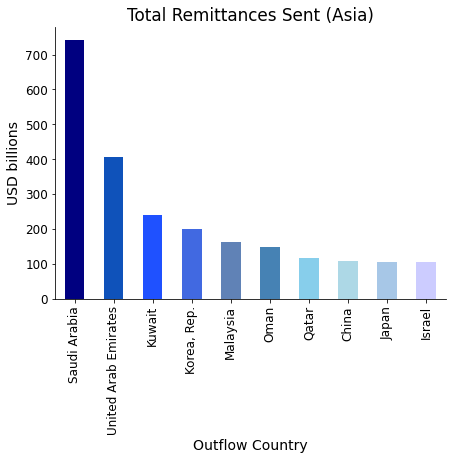

In [35]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
asia.total_rem[:10].plot(kind='bar', title='Total Remittances Sent (Asia)', ylabel='USD billions', color=ascoll, fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)  

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### Trends over Time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/1960359573.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


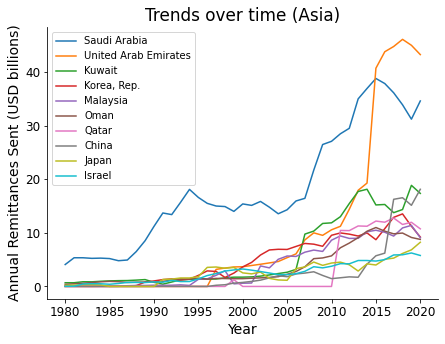

In [36]:
asiaa = asia.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)
# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (Asia)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    asiaa.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## East Asia & the Pacific Analysis

In [37]:
eap = out_global.loc[out_global.region == 'EAP']
eap = eap.sort_values('total_rem', ascending=False)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/902166572.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


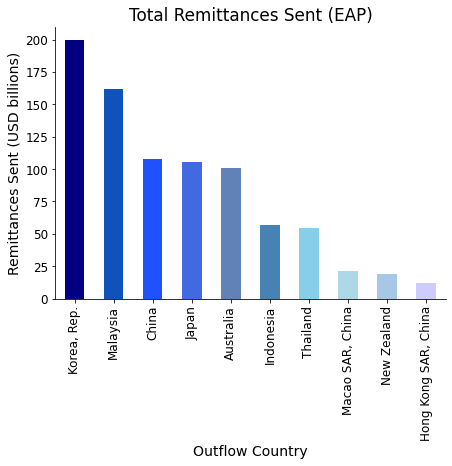

In [38]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
eap.total_rem[:10].plot(kind='bar', title='Total Remittances Sent (EAP)', ylabel='Remittances Sent (USD billions)', color=ascoll, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### EAP Trends over Time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/1938695360.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])


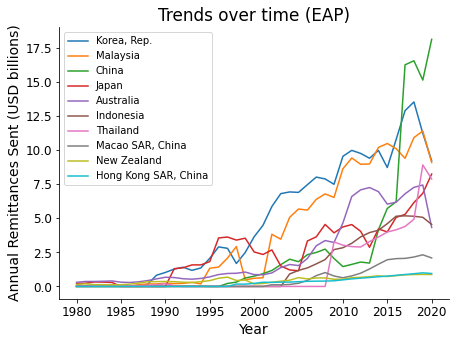

In [39]:
eapp = eap.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (EAP)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    eapp.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## South Asia Analysis

In [40]:
sas = out_global.loc[out_global.region == 'SAS']
sas = sas.sort_values('total_rem', ascending=False)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/4270998735.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


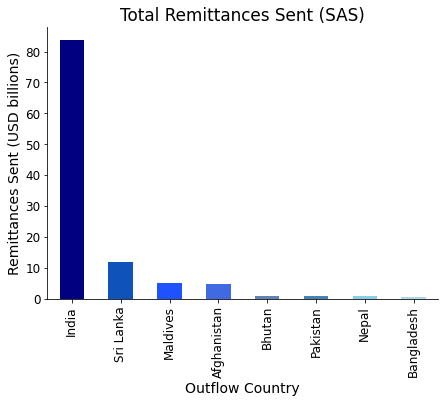

In [41]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
sas.total_rem[:15].plot(kind='bar', title='Total Remittances Sent (SAS)', ylabel='Remittances Sent (USD billions)', color=ascoll, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### SAS Trends Over Time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/2702631923.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


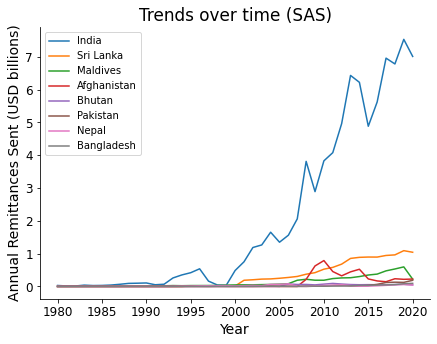

In [42]:
sass = sas.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (SAS)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(len(SAS)):
    sass.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## Middle East & North Africa (MENA) Analysis

In [43]:
mena = out_global.loc[out_global.region == 'MENA']
mena = mena.sort_values('total_rem', ascending=False)
mencoll = ['#770737','#9F2B68','#DE3163','#FF10F0','#DA70D6','#FF69B4','#E37383','#F8C8DC','#F3CFC6','#F2D2BD']

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/2843848877.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


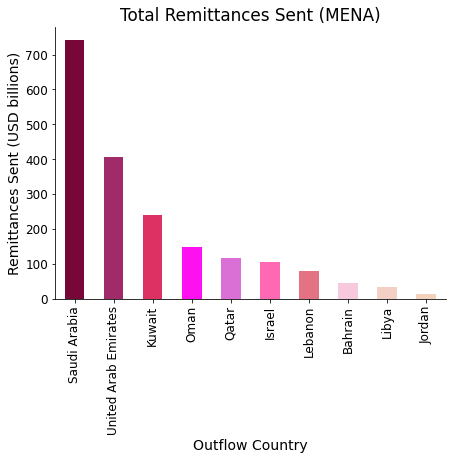

In [44]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
mena.total_rem[:10].plot(kind='bar', title='Total Remittances Sent (MENA)', ylabel='Remittances Sent (USD billions)', color=mencoll, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### MENA Trends Over Time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/3091710187.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


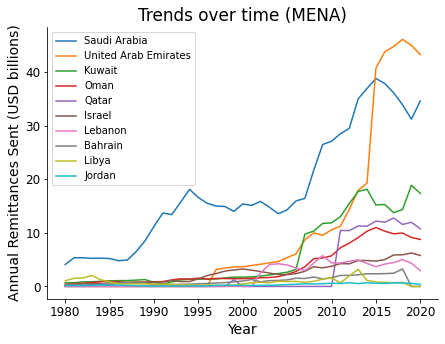

In [45]:
menaa = mena.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (MENA)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    menaa.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## Eastern Europe & Central Asia Analysis

In [46]:
euca = out_global.loc[out_global.region == 'EUCA']
euca = euca.sort_values('total_rem', ascending=False)
eucoll = ['#CD7F32','#CC5500','#F28C28','#E3963E','#FFBF00','#DAA520','#FFC000','#FFEA00','#FAC898','#FFE5B4']

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/2625329948.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


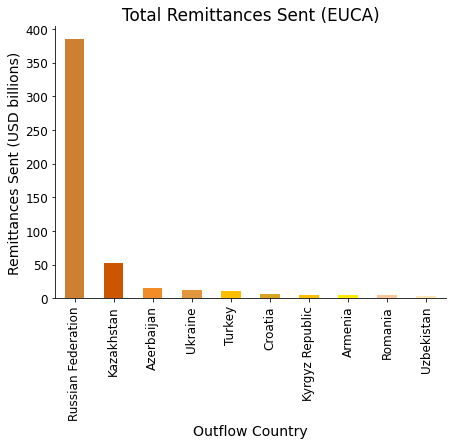

In [47]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
euca.total_rem[:10].plot(kind='bar', title='Total Remittances Sent (EUCA)', ylabel='Remittances Sent (USD billions)', color=eucoll, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### EUCA Trends over time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/3124493559.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


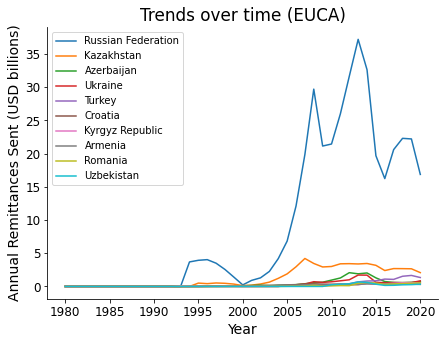

In [48]:
eucaa = euca.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (EUCA)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    eucaa.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

In [49]:
plt.close('all')
# overlap between senders and receivers
# what are the top migrant groups in SEDING countries

## Latin America & Caribbean Analysis

In [50]:
lac = out_global.loc[out_global.region == 'LAC']
lac = lac.sort_values('total_rem', ascending=False)
laccoll = ['#02000A','#120632','#2E165B','#532D84','#7E4EAC','#AF77D5','#CF9FFF','#E0B0FF','#da8ee7','#e8bcf0','#BDB5D5']

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/2879886210.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


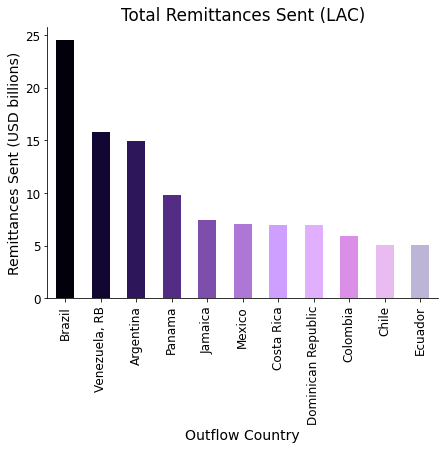

In [51]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
lac.total_rem[:11].plot(kind='bar', color=laccoll, title='Total Remittances Sent (LAC)', ylabel='Remittances Sent (USD billions)', fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### LAC Trends over time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/20526329.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])


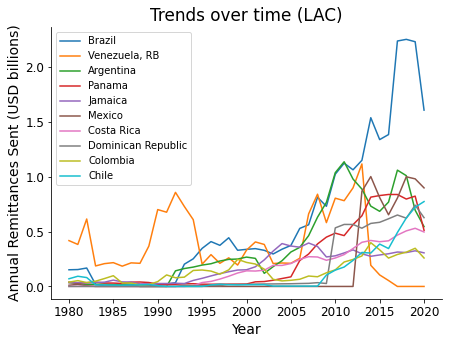

In [52]:
lacc = lac.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (LAC)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    lacc.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## Africa Analysis

In [53]:
africa = out_global.loc[out_global.continentcode == 'AF']
africa = africa.sort_values('total_rem', ascending=False)
afcoll = ['#355E3B','#00A36C','#2AAA8A','#2e8b57','#228b22','#32cd32','#b2ec5d','#c5e384','#AFE1AF','#e9ffdb']

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/774019942.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


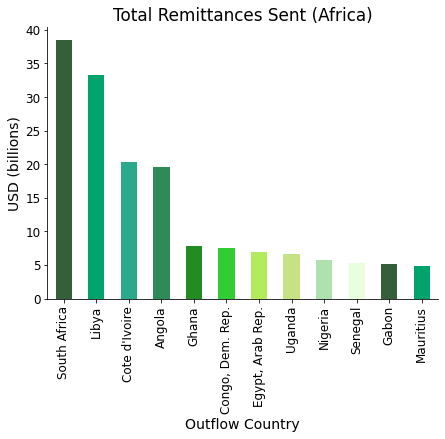

In [54]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
africa.total_rem[:12].plot(kind='bar', color=afcoll, title='Total Remittances Sent (Africa)', ylabel='USD (billions)', fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### Africa Trends over time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/2529419873.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])


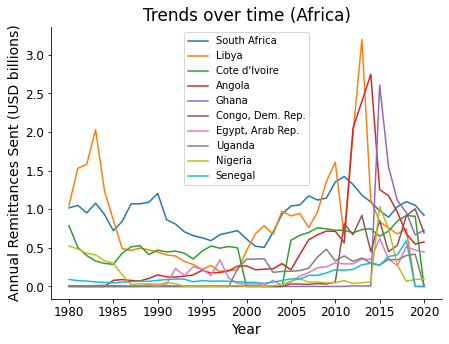

In [55]:
africaa = africa.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (Africa)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    africaa.iloc[i].plot(fontsize=12)
    
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## West & Central Africa Analysis

In [56]:
wcaf = out_global.loc[out_global.region == 'WCAF']
wcaf = wcaf.sort_values('total_rem', ascending=False)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/2251332759.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])


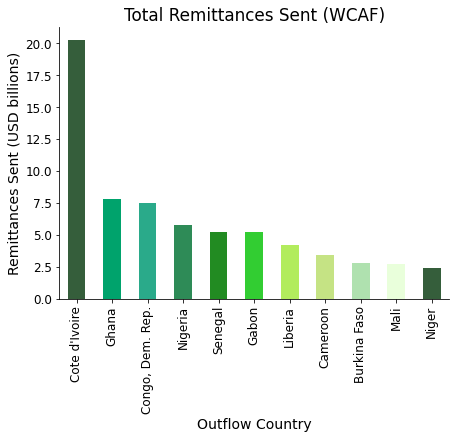

In [57]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
wcaf.total_rem[:11].plot(kind='bar', title='Total Remittances Sent (WCAF)', ylabel='Remittances Sent (USD billions)', color=afcoll, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### WCAF Trends over time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/4081499478.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])


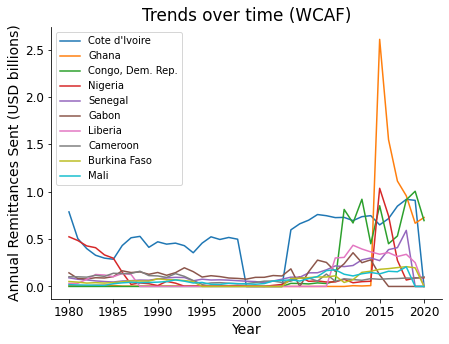

In [58]:
wcaff = wcaf.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (WCAF)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    wcaff.iloc[i].plot(fontsize=12)
    
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## East & Southern Africa Analysis

In [59]:
esaf = out_global.loc[out_global.region == 'ESAF']
esaf = esaf.sort_values('total_rem', ascending=False)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/2110515765.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


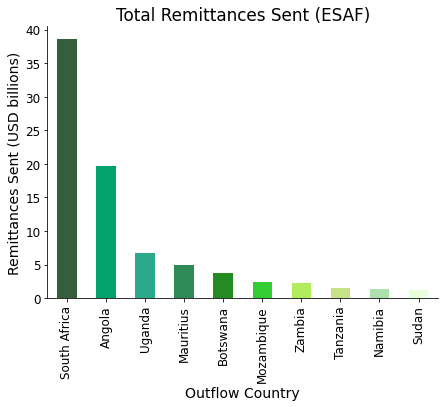

In [60]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
esaf.total_rem[:10].plot(kind='bar', title='Total Remittances Sent (ESAF)', ylabel='Remittances Sent (USD billions)', color=afcoll, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### ESAF Trends over time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/1426501473.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])


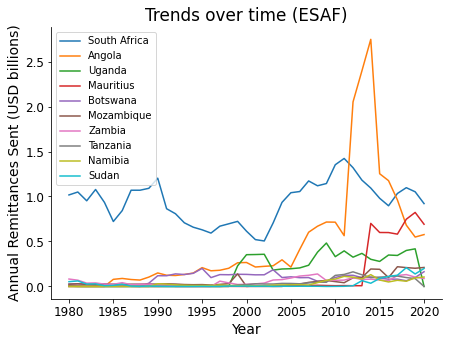

In [61]:
esaff = esaf.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (ESAF)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    esaff.iloc[i].plot(fontsize=12)
    
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [62]:
plt.close('all')

# GLOBAL WORLDVIEW

In [63]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [64]:
import geopandas as gpd
import mapclassify
import plotly.graph_objs as go 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'name':'country'})
countries = countries.rename({'name':'country'}, axis=1)
orig_countries = out_global.reset_index().rename({'Outflow Country':'country'}, axis=1)

/Users/Jane/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [65]:
foo = pd.merge(countries, world, on='country', how='right')
# merging countries with world to obtain geometry column from world

In [66]:
# Make foo country names in merge match original list to maintain necessary geometries
foo.at[4, 'country'] = 'United States'
foo.at[11, 'country'] = 'Congo, Dem. Rep.'
foo.at[17, 'country'] = 'Dominican Republic'
foo.at[18, 'country'] = 'Russian Federation'
foo.at[19, 'country'] = 'Bahamas, The'
foo.at[40, 'country'] = 'Venezuela, RB'
foo.at[60, 'country'] = "Cote d'Ivoire"
foo.at[66, 'country'] = 'Central African Republic'
foo.at[69, 'country'] = 'Equatorial Guinea'
foo.at[73, 'country'] = 'Eswatini'
foo.at[80, 'country'] = 'Gambia, The'
orig_countries.at[88, 'country'] = 'Iran'
orig_countries.at[99, 'country'] = 'South Korea'
orig_countries.at[102, 'country'] = 'Kyrgyzstan'
orig_countries.at[206, 'country'] = 'Yemen'
foo.at[108, 'country'] = 'Syrian Arab Republic'
foo.at[149, 'country'] = 'Brunei Darussalam'
foo.at[152, 'country'] = 'Slovak Republic'
foo.at[153, 'country'] = 'Czech Republic'
foo.at[163, 'country'] = 'Egypt, Arab Rep.'
foo.at[167, 'country'] = 'Somalia'
foo.at[170, 'country'] = 'Bosnia and Herzegovina'
foo.at[171, 'country'] = 'North Macedonia'
foo.at[176, 'country'] = 'South Sudan'
foo.at[160, 'country'] = 'Cyprus'

In [67]:
new_world = pd.merge(foo, orig_countries, on='country', how='left')
new_world = gpd.GeoDataFrame(new_world, geometry='geometry')    # convert pandas df to geodataframe for plotting

In [68]:
new_world[new_world.geometry.isna()]    # all items now have geometries

,geonameid_x,country,iso,iso3,isonumeric,fips,continentcode_x,capital_x,areakm2,population,...,2020,total_rem,continentcode_y,capital_y,population_x,currencycode_y,languages_y,geonameid_y,continent_y,region


In [69]:
new_world[new_world.total_rem < 1]    # correcting for countries with 0 total_rem values --> no data label
new_world.at[12,'total_rem'] = np.nan
new_world.at[47,'total_rem'] = np.nan
new_world.at[69,'total_rem'] = np.nan
new_world.at[107,'total_rem'] = np.nan
new_world.at[167,'total_rem'] = np.nan

In [70]:
pp = new_world.loc[:,'country'] == 'Guyana'
pp.sort_values(ascending=False)
new_world[41:42].plot(column='total_rem', legend=True)
# That orange anomaly in LAC is not Guyana. It is French Guyana, classified as part of France so has France's attributes despite location
plt.close()

## Global Worldview

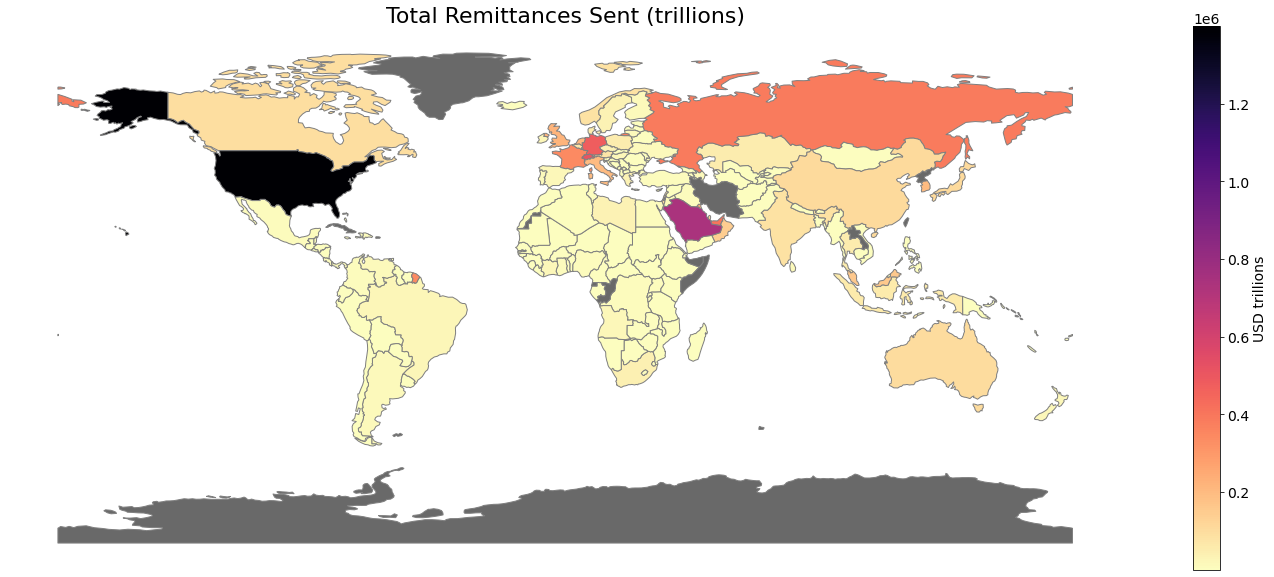

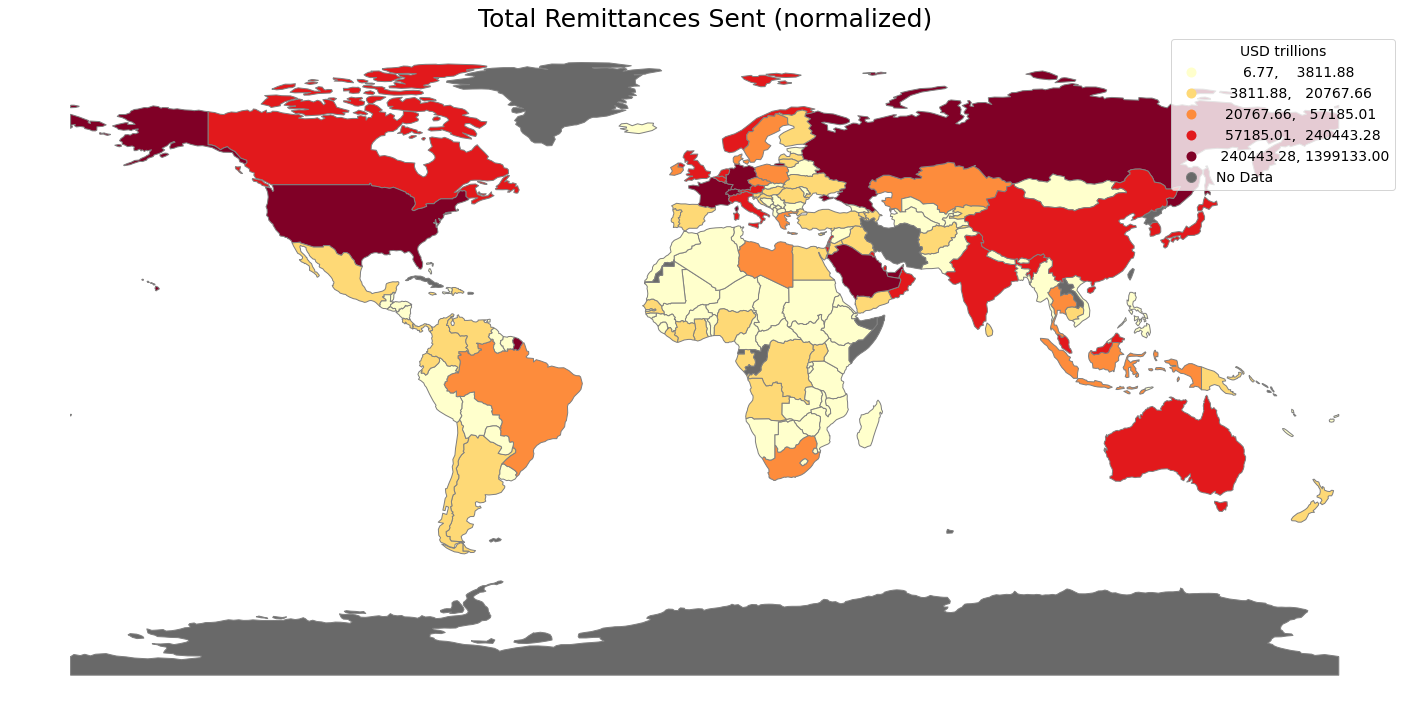

In [71]:
new_world.plot(column='total_rem', cmap='magma_r', figsize=(25,25), 
               legend=True, legend_kwds={'label': 'USD trillions', 'shrink': 0.4},
               edgecolor='grey', missing_kwds={'label': 'No Data', 'color':'dimgrey'})
# not optimized bc Jenks optimization creates bins that hide the slight variation between countries (ie. ~all Africa+LAC same color)
plt.title('Total Remittances Sent (trillions)', fontsize=22)
plt.axis('off')

new_world.plot(column='total_rem', cmap='YlOrRd', scheme='jenkscaspall', 
               legend=True, legend_kwds={'title': 'USD trillions'},
               figsize=(25,25), edgecolor='grey', missing_kwds={'label': 'No Data', 'color':'dimgrey'})
plt.title('Total Remittances Sent (normalized)', fontsize=25)
plt.axis('off')
plt.show()

The Jenks optimization method (natural breaks classification) is a data clustering method designed to determine the best arrangement of values into different classes. This is done by seeking to minimize each class's average deviation from the class mean, while maximizing each class's deviation from the means of the other classes (ie. the method reduces variance within classes and maximizes the variance between classes)

In [72]:
new_world.plot(column='total_rem', cmap='YlOrRd', scheme='quantiles', k=10, legend=True, figsize=(25,25), edgecolor='grey', missing_kwds={'label': 'No Data', 'color':'dimgrey'})
plt.title('Total Remittances Sent (by percentile)', fontsize=25)
plt.close()
# Percentiles figure here is slightly different from Jenks (k=10), but much more different from automated Jenkscaspall

# NA close-up

In [73]:
na = new_world[new_world["region"] == "NA"]
na = gpd.GeoDataFrame(na, geometry='geometry')
na = na.set_index('country').sort_values('total_rem', ascending=False)
na['billions'] = na.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/2359258591.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


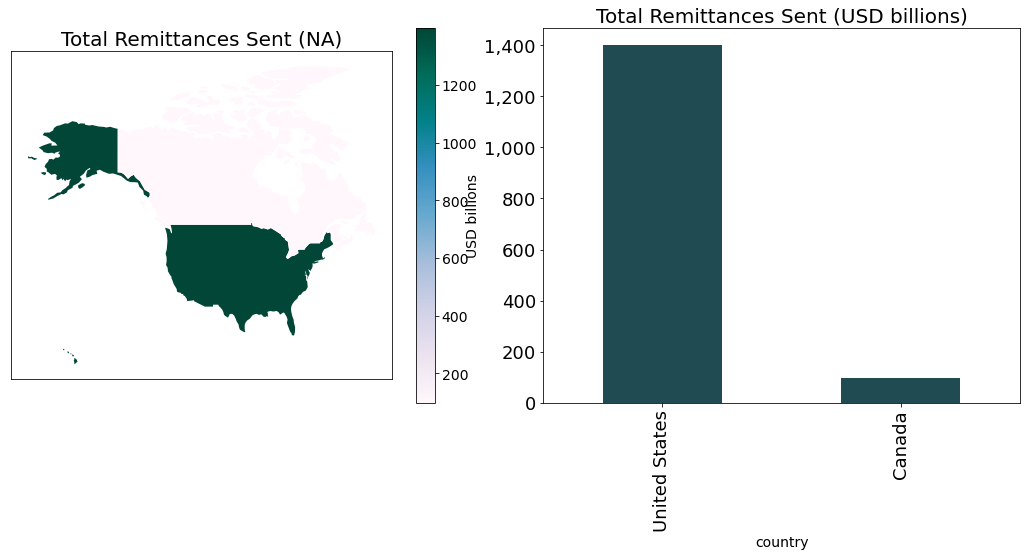

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.tight_layout()


na.plot(column='billions', cmap='PuBuGn', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Sent (NA)', fontsize=20)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

na.total_rem[:11].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='#204B53', fontsize=18)
plt.title('Total Remittances Sent (USD billions)', fontsize=20)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

# LAC close-up

In [75]:
lacc = new_world[new_world["region"] == "LAC"]
lacc = gpd.GeoDataFrame(lacc, geometry='geometry')
lacc['billions'] = lacc.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/4165393872.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


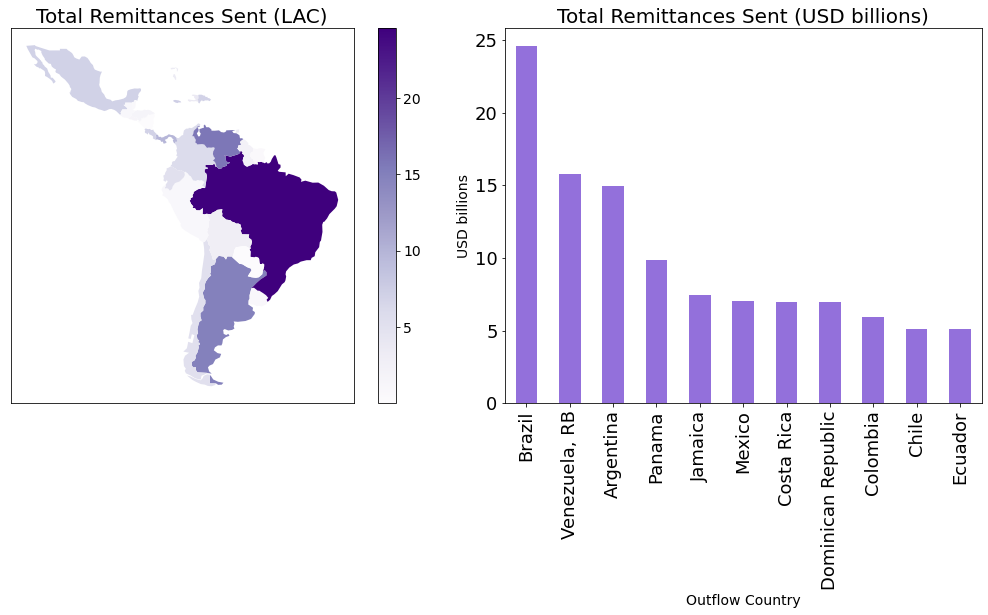

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.tight_layout()


lacc.plot(column='billions', cmap='Purples', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Sent (LAC)', fontsize=20)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

lac.total_rem[:11].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='mediumpurple', fontsize=18)
plt.title('Total Remittances Sent (USD billions)', fontsize=20)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

# WEU close-up

In [77]:
weu = new_world[new_world["region"] == "WEU"]
weu = gpd.GeoDataFrame(weu, geometry='geometry')
weu['billions'] = weu.total_rem/1000
weu = weu.set_index('country').sort_values('total_rem', ascending=False)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/1404942475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


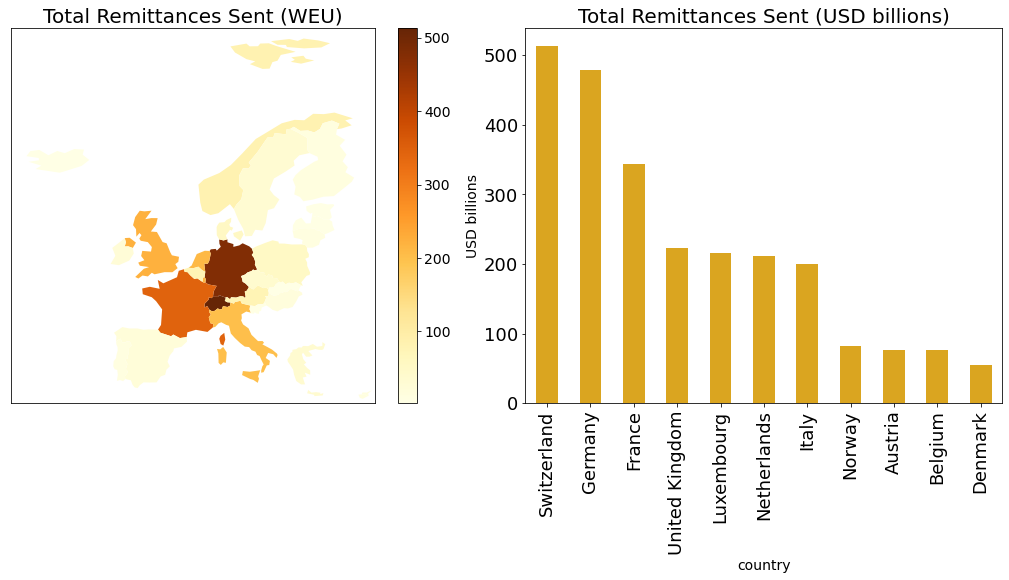

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.tight_layout()

weu.plot(column='billions', cmap='YlOrBr', legend=True, ax=axes[0], figsize=(10,5))
axes[0].set_title('Total Remittances Sent (WEU)', fontsize=20)
axes[0].set_xlim(-27, 35)
axes[0].set_ylim(34, 82)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

weu.total_rem[:11].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='goldenrod', fontsize=18)
plt.title('Total Remittances Sent (USD billions)', fontsize=20)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

# EUCA close-up

In [79]:
euca = new_world[new_world["region"] == "EUCA"]
euca = gpd.GeoDataFrame(euca, geometry='geometry')
euca = euca.set_index('country').sort_values('total_rem', ascending=False)
euca['billions'] = euca.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/1337487796.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


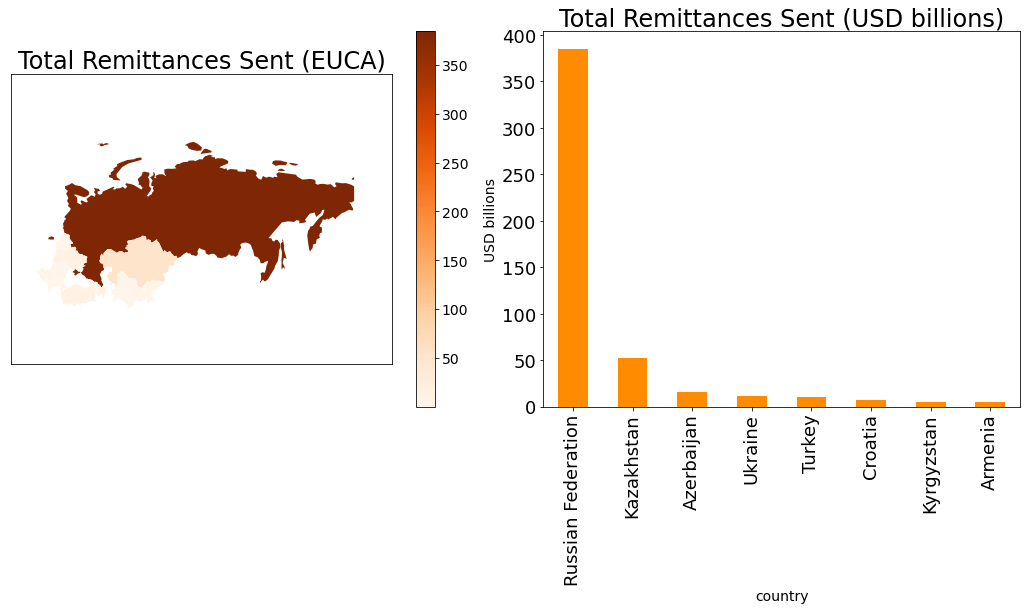

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.tight_layout()

euca.plot(column='billions', cmap='Oranges', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Sent (EUCA)', fontsize=24)
axes[0].set_xlim(0, 200)
axes[0].set_ylim(20, 100)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

euca.total_rem[:8].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='darkorange', fontsize=18)
plt.title('Total Remittances Sent (USD billions)', fontsize=24)   
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

#  MENA close-up

In [81]:
mena = new_world[new_world["region"] == "MENA"]
mena = gpd.GeoDataFrame(mena, geometry='geometry')
mena = mena.set_index('country').sort_values('total_rem', ascending=False)
mena['billions'] = mena.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/477962865.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


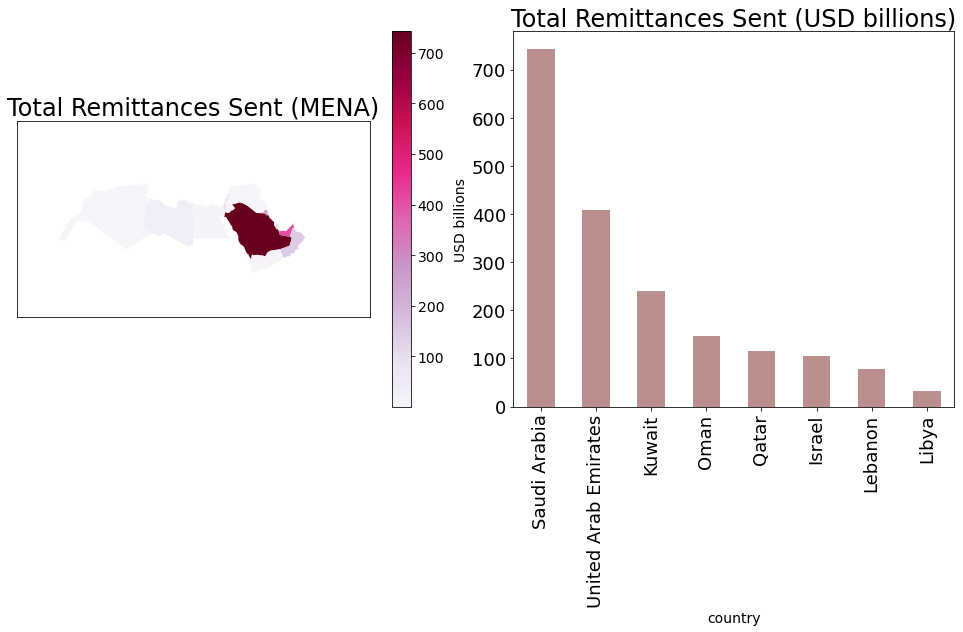

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.tight_layout()

mena.plot(column='billions', cmap='PuRd', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Sent (MENA)', fontsize=24)
axes[0].set_xlim(-30, 80)
axes[0].set_ylim(0, 55)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

mena.total_rem[:8].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='rosybrown', fontsize=18)
plt.title('Total Remittances Sent (USD billions)', fontsize=24)   
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

# WCAF close-up

In [83]:
wcaf = new_world[new_world["region"] == "WCAF"]
wcaf = gpd.GeoDataFrame(wcaf, geometry='geometry')
wcaf = wcaf.set_index('country').sort_values('total_rem', ascending=False)
wcaf['billions'] = wcaf.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/3167577912.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


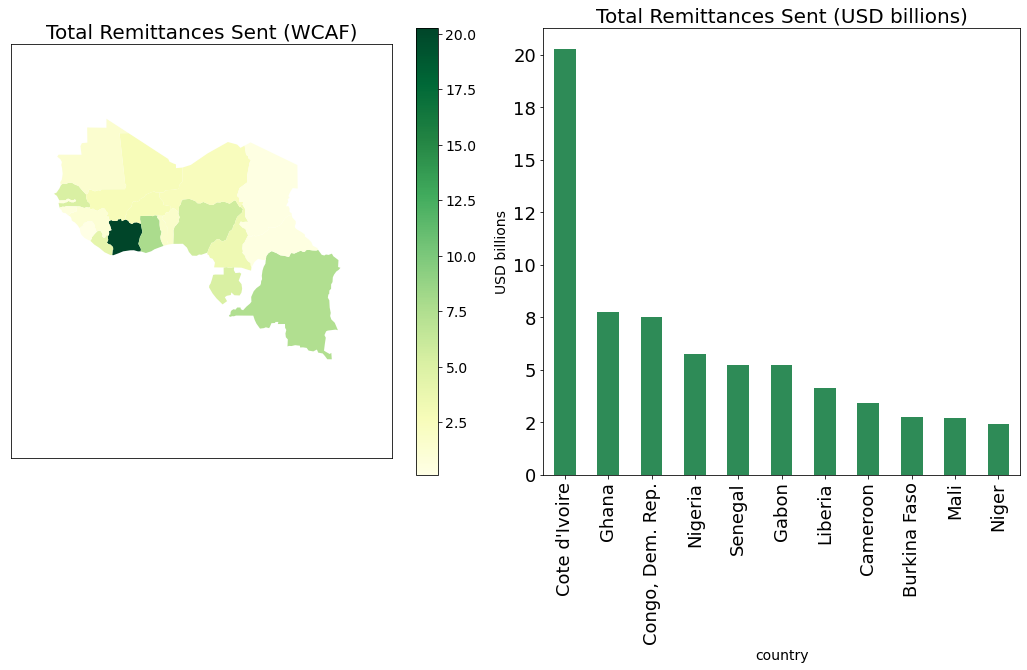

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
fig.tight_layout()

wcaf.plot(column='billions', cmap='YlGn', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Sent (WCAF)', fontsize=20)
axes[0].set_xlim(-25,40)
axes[0].set_ylim(-30, 40)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

wcaf.total_rem[:11].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='seagreen', fontsize=18)
plt.title('Total Remittances Sent (USD billions)', fontsize=20)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

# ESAF close-up

In [85]:
esaf = new_world[new_world["region"] == "ESAF"]
esaf = gpd.GeoDataFrame(esaf, geometry='geometry')
esaf = esaf.set_index('country').sort_values('total_rem', ascending=False)
esaf['billions'] = esaf.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/110184584.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


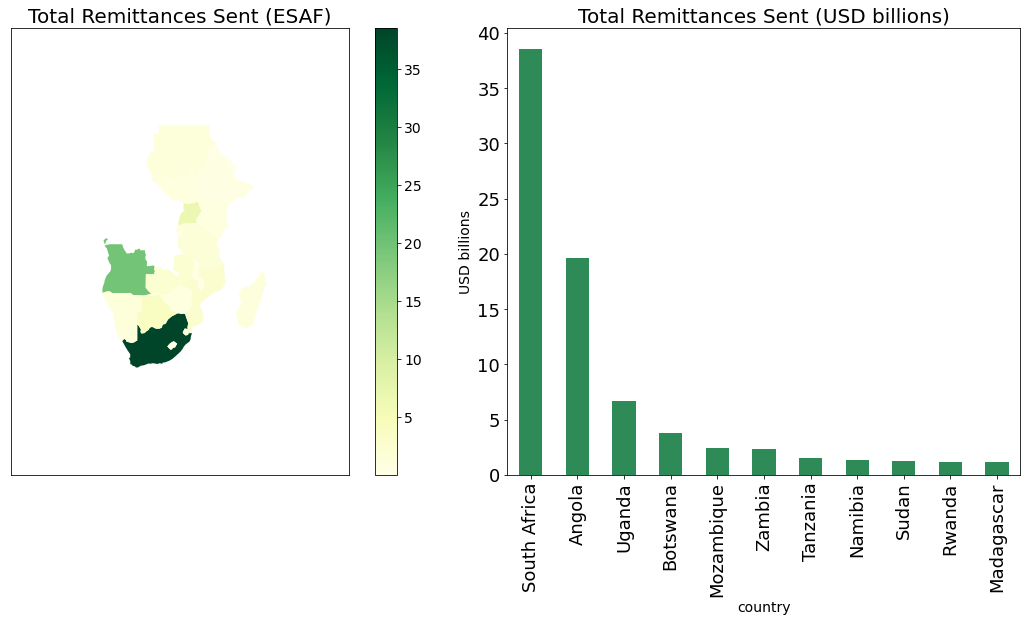

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
fig.tight_layout()

esaf.plot(column='billions', cmap='YlGn', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Sent (ESAF)', fontsize=20)
axes[0].set_xlim(-10,70)
axes[0].set_ylim(-60, 45)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

esaf.total_rem[:11].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='seagreen', fontsize=18)
plt.title('Total Remittances Sent (USD billions)', fontsize=20)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

# EAP close-up

In [87]:
eap = new_world[new_world["region"] == "EAP"]
eap = gpd.GeoDataFrame(eap, geometry='geometry')
eap = eap.set_index('country').sort_values('total_rem', ascending=False)
eap['billions'] = eap.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/1710614170.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


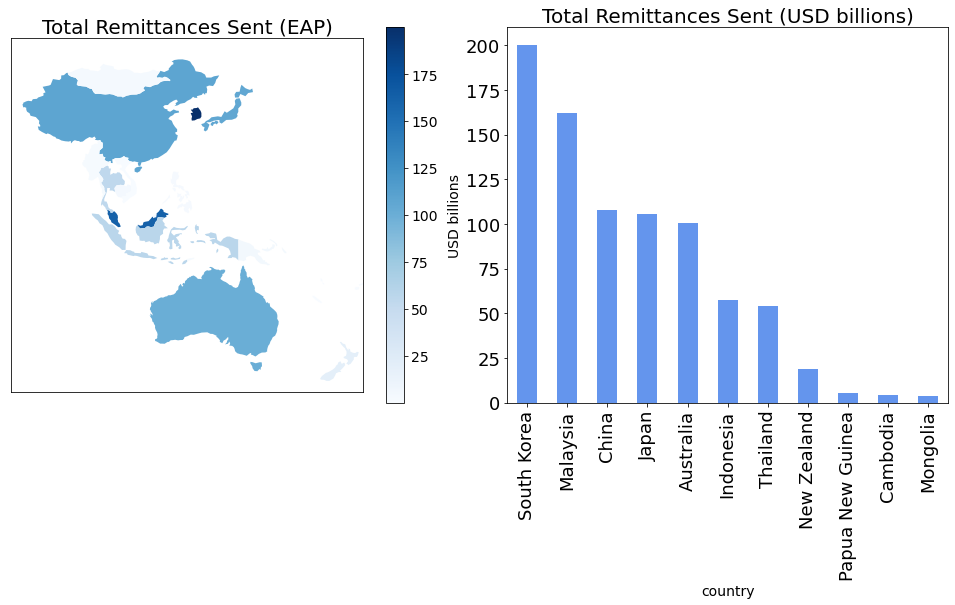

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.tight_layout()

eap.plot(column='billions', cmap='Blues', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Sent (EAP)', fontsize=20)
axes[0].set_xlim(70,180)
axes[0].set_ylim(-50, 60)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

eap.total_rem[:11].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='cornflowerblue', fontsize=18)
plt.title('Total Remittances Sent (USD billions)', fontsize=20)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

# SAS close-up

In [89]:
sas = new_world[new_world["region"] == "SAS"]
sas = gpd.GeoDataFrame(sas, geometry='geometry')
sas = sas.set_index('country').sort_values('total_rem', ascending=False)
sas['billions'] = sas.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/2949736270.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


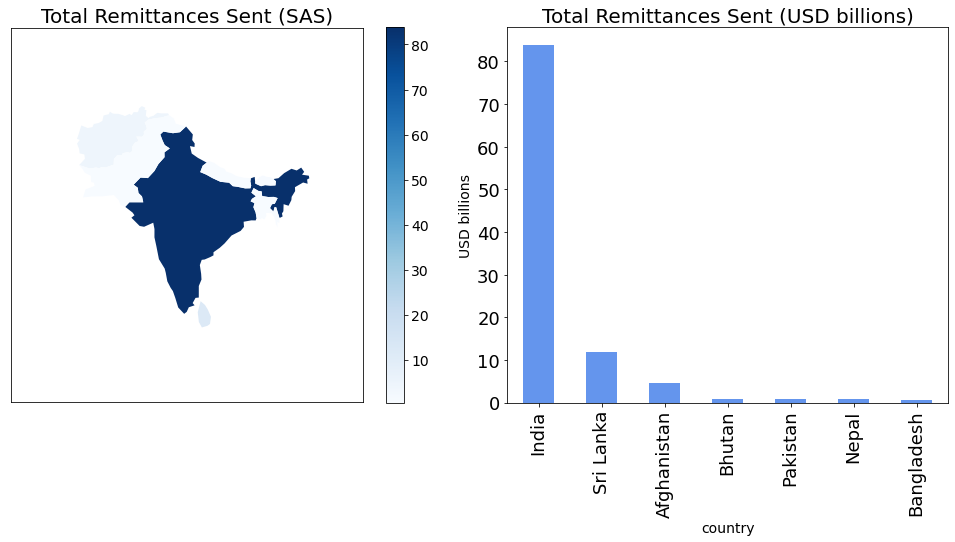

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.tight_layout()

sas.plot(column='billions', cmap='Blues', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Sent (SAS)', fontsize=20)
axes[0].set_xlim(50,106)
axes[0].set_ylim(-5, 50)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

sas.total_rem[:11].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='cornflowerblue', fontsize=18)
plt.title('Total Remittances Sent (USD billions)', fontsize=20)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

In [91]:
# Bubble map w/ remit. as proportional bubble sizes
centroids = new_world.copy()
centroids.geometry = new_world.centroid

ax = new_world.plot(facecolor='w', edgecolor='k', figsize=(20,20))
centroids.plot(markersize=new_world['total_rem']/200, ax=ax)
# centroid size reflects magnitude of remit sent
sns.set_theme(style="darkgrid")
plt.close('all')


/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89955/2299758579.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids.geometry = new_world.centroid
